In [4]:
library(rvest)
library(dplyr)

ranks = read_html('https://cwur.org/2018-19.php')
ranks %>% html_nodes('table')
fullrdata = ranks %>% html_nodes('table') %>% .[[1]] %>%
  html_table()
col = names(fullrdata)
names(fullrdata) = make.names(col)
rdata = filter(fullrdata, Quality.of.Education != '-' & Alumni.Employment != '-' & Quality.of.Faculty!= '-' & Research.Output!= '-' & Quality..Publications!= '-' & Influence!= '-' &Citations!= '-')
rdata = na.omit(rdata)

{xml_nodeset (1)}
[1] <table class="table">\n<style>\n          table {\n                 borde ...

In [7]:
#turn '>1000' -> '1000' in order to analyse data numerically
for (i in 1:nrow(rdata)){
    for (j in 1:ncol(rdata)){
        if (rdata[i,j] == '> 1000'){
            rdata[i,j] = 1000
        }
    }
}
head(rdata)

World.Rank,Institution,Location,National.Rank,Quality.of.Education,Alumni.Employment,Quality.of.Faculty,Research.Output,Quality..Publications,Influence,Citations,Score
1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
6,"University of California, Berkeley",USA,4,7,52,5,18,12,4,8,92.5


In [6]:
WR = rdata$World.Rank
QE = rdata$Quality.of.Education
QP = rdata$Quality..Publications

In [13]:
country_list = sort(table(fullrdata$Location), decreasing = TRUE)
country_list = as.data.frame(country_list)
country_list = setNames(object = country_list, c('Country', 'Freq'))
head(country_list)

Country,Freq
USA,213
China,108
United Kingdom,62
France,58
Japan,56
Germany,54


In [74]:
countries = read.csv("countries.txt")
countries$Continent = as.character(countries$Continent)
countries$Country = as.character(countries$Country)
Country_Continent = left_join(country_list, countries, by=c("Country"="Country")) 
Country_Continent$Continent[Country_Continent$Country == 'Taiwan'] = 'Asia'

Warning message:
"Column `Country` joining factor and character vector, coercing into character vector"

In [183]:
Country_Continent = Country_Continent %>% arrange(Continent)
Con = Country_Continent$Continent
Coun = Country_Continent$Country
head(Country_Continent)

Country,Freq,Continent
South Africa,7,Africa
Egypt,4,Africa
Nigeria,1,Africa
Tunisia,1,Africa
Uganda,1,Africa
China,108,Asia


In [215]:
theme_lucy = function (base_size = 10, base_family = "") {
  theme_minimal(base_size = base_size, base_family = base_family) %+replace%
    theme(axis.text = element_text(colour = "grey50", size = 8),
          axis.title.x = element_text(colour = "dodgerblue", size = 12, margin = margin(t = 20, r = 20, b = 20, l = 20)),
          axis.title.y = element_text(colour = "dodgerblue", angle = 90, size = 12, margin = margin(t = 0, r = 20, b = 0, l = 0)),
          panel.grid.minor = element_blank(),
          panel.grid.major.y = element_blank(),
          plot.title = element_text(colour = "black", size = 14, margin = margin(t = 20, r = 0, b = 20, l = 0)),
          legend.title = element_text(size = 12)

  )
}

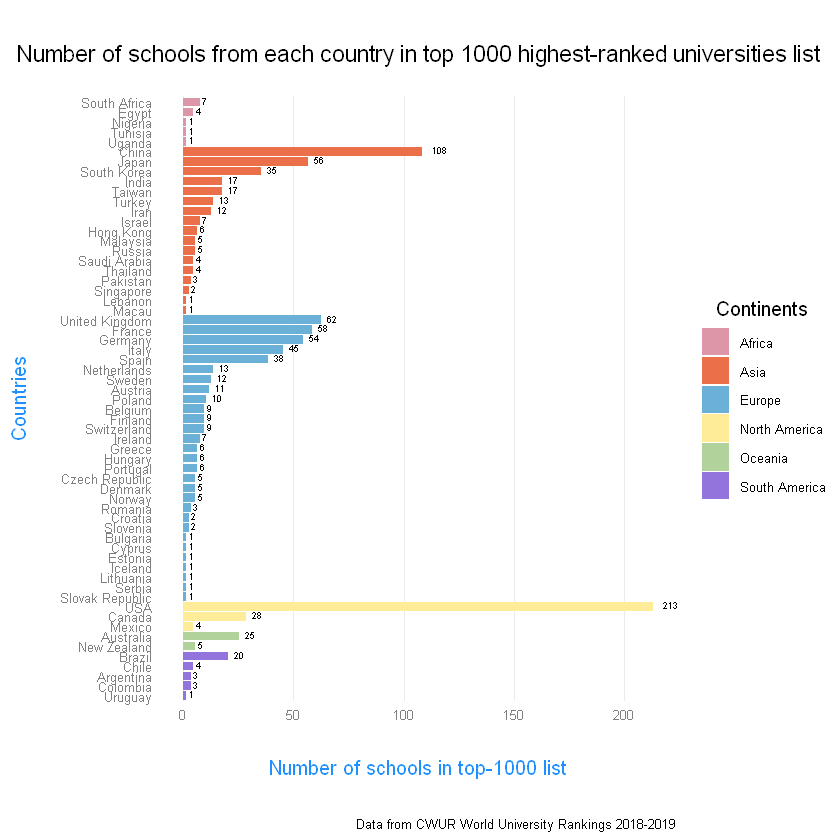

In [235]:
library(ggplot2)
par(mai = c(1,1,1,1), omd = c(1,1,1,1), pin = c(7,9))
p = ggplot(Country_Continent, aes(x=`Country`, y=Freq, label=Freq))
p = p + geom_bar(stat='identity', aes(colour = factor(Continent), fill = factor(Continent)), width = 0.75, position=position_dodge()) + coord_flip() + geom_text(aes(label=Freq), hjust = -0.7, vjust=0.3, size=2)
p = p + scale_x_discrete (limits = rev(Coun)) + theme_lucy() + scale_fill_manual('Continents',values=c('#DC96A7','#EB704A','#6AB0D7','#FEEC98','#B1D39B','#9274DC')) + scale_colour_manual('Continents',values=c('#DC96A7','#EB704A','#6AB0D7','#FEEC98','#B1D39B','#9274DC'))
p + labs(title="Number of schools from each country in top 1000 highest-ranked universities list", caption = 'Data from CWUR World University Rankings 2018-2019', x ="Countries", y = "Number of schools in top-1000 list")

In [244]:
#PDF file
pdf("Assignment_4.pdf", width=7, height=9)
par(mai = c(1,1,1,1), omd = c(1,1,1,1), pin = c(7,9))
p = ggplot(Country_Continent, aes(x=`Country`, y=Freq, label=Freq))
p = p + geom_bar(stat='identity', aes(colour = factor(Continent), fill = factor(Continent)), width = 0.75, position=position_dodge()) + coord_flip() + geom_text(aes(label=Freq), hjust = -0.7, vjust=0.3, size=2)
p = p + scale_x_discrete (limits = rev(Coun)) + theme_lucy() + scale_fill_manual('Continents',values=c('#DC96A7','#EB704A','#6AB0D7','#FEEC98','#B1D39B','#9274DC')) + scale_colour_manual('Continents',values=c('#DC96A7','#EB704A','#6AB0D7','#FEEC98','#B1D39B','#9274DC'))
p + labs(title="Number of schools from each country in top 1000 highest-ranked universities list", caption = 'Data from CWUR World University Rankings 2018-2019', x ="Countries", y = "Number of schools in top-1000 list")
dev.off()


png 
  2

In [245]:
#PNG file (resolution = 300dpi)
png("Assignment_4.png", width=7, height=9, units = 'in', res = 300)
par(mai = c(1,1,1,1), omd = c(1,1,1,1), pin = c(7,9))
p = ggplot(Country_Continent, aes(x=`Country`, y=Freq, label=Freq))
p = p + geom_bar(stat='identity', aes(colour = factor(Continent), fill = factor(Continent)), width = 0.75, position=position_dodge()) + coord_flip() + geom_text(aes(label=Freq), hjust = -0.7, vjust=0.3, size=2)
p = p + scale_x_discrete (limits = rev(Coun)) + theme_lucy() + scale_fill_manual('Continents',values=c('#DC96A7','#EB704A','#6AB0D7','#FEEC98','#B1D39B','#9274DC')) + scale_colour_manual('Continents',values=c('#DC96A7','#EB704A','#6AB0D7','#FEEC98','#B1D39B','#9274DC'))
p + labs(title="Number of schools from each country in top 1000 highest-ranked universities list", caption = 'Data from CWUR World University Rankings 2018-2019', x ="Countries", y = "Number of schools in top-1000 list")
dev.off()

png 
  2